In [1]:
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as nmp
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import DBSCAN


In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

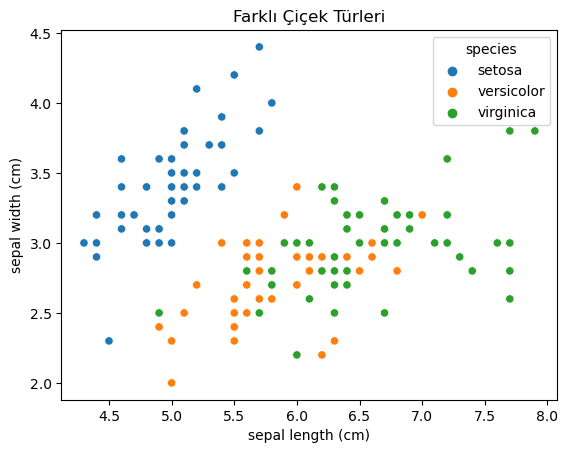

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title("Farklı Çiçek Türleri")
plt.show()

In [4]:
df.shape  # gözlem ve feature sayısı

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [6]:
df.columns  # feature(sütun) isimleri

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [7]:
df.describe()  # özet istatistikleri hesapla

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes 

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

In [9]:
df.isnull().sum()   # her feature(sütun) için eksik değer sayısı 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [10]:
df['species'].unique()  # sütundaki tekrarlanmayan tüm farklı değerleri listele

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [11]:
df['species'].nunique()   # sütunda kaç farklı (benzersiz) değer olduğunu hesapla

3

In [12]:
df['species'].value_counts()  # sütundaki her benzersiz değerin kaç kere tekrar ettiğini(sıklığını) hesapla

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'İris Çiçek Tür Dağılımı')

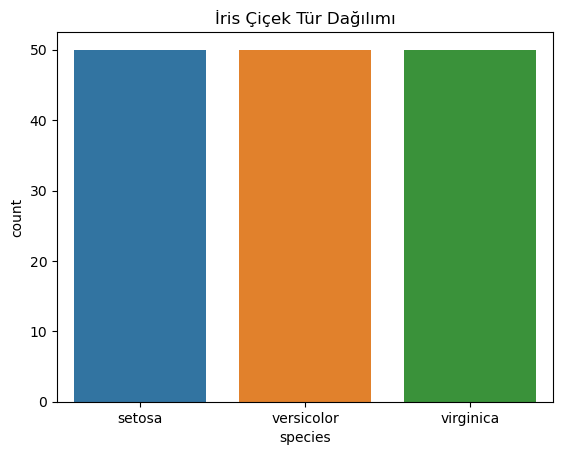

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='species', data=df).set_title("İris Çiçek Tür Dağılımı")

In [14]:
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
# rastgele birkaç satırda yer alan setosa türünü virginica olarak yeniden düzenle
df.iloc[2, 4] = 'virginica'
df.iloc[7, 4] = 'virginica'
df.iloc[9, 4] = 'virginica'
df.iloc[11, 4] = 'virginica'

In [16]:
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,virginica
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,virginica
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,virginica


In [17]:
virginica_df = df.loc[df['species'] == 'virginica']
virginica_df = virginica_df.reset_index(drop=True)  # filtreleme sonrası bozulmuş olabilecek indeksleri sıfırla (0'dan başlayarak yeniden numaralandır).


In [18]:
virginica_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.7,3.2,1.3,0.2,virginica
1,5.0,3.4,1.5,0.2,virginica
2,4.9,3.1,1.5,0.1,virginica
3,4.8,3.4,1.6,0.2,virginica
4,6.3,3.3,6.0,2.5,virginica


In [19]:
# oluşan yeni veri setini ölçeklendir
virginica_np = virginica_df.iloc[:,:4].values
scaler = MinMaxScaler()
virginica_sc = scaler.fit_transform(virginica_np)

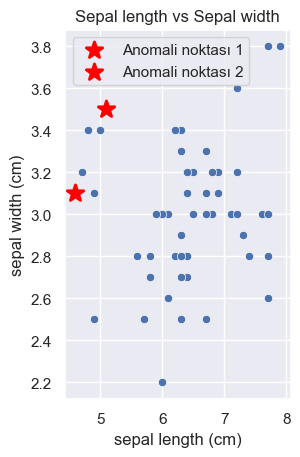

In [20]:
# virginica türündeki çiçeklerin sepal uzunluk ve genişliğini görselleştirerek 2 anomaliyi işaretle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
plt.subplot(1, 2, 1)
sns.scatterplot(data=virginica_df, x='sepal length (cm)', y='sepal width (cm)')
plt.scatter(x=5.1, y=3.5, marker='*', color='red', linewidths=2.1, s=150, label='Anomali noktası 1')
plt.scatter(x=4.6, y=3.1, marker='*', color='red', linewidths=2.1, s=150, label='Anomali noktası 2')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal length vs Sepal width')
plt.legend()
plt.savefig('Sepal_length_vs_width_V-1.png')

plt.show()
plt.close()


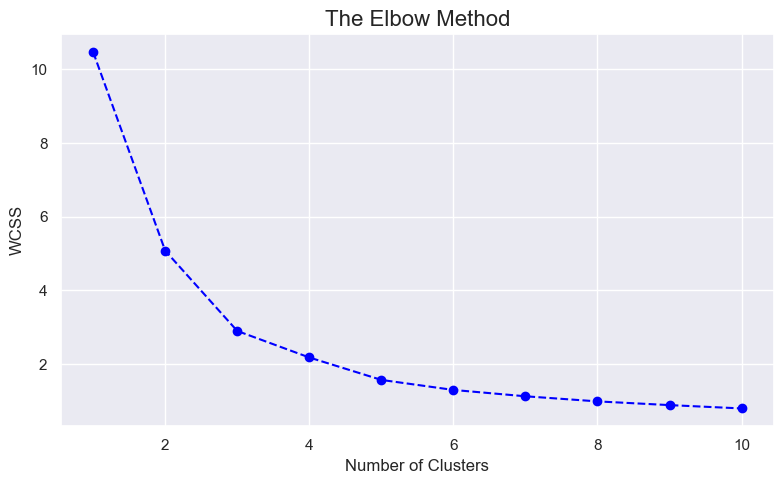

In [21]:
# en uygun küme sayısını belirlemek için "Dirsek (Elbow) Yöntemini" uygula
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(virginica_sc)  
    wcss.append(kmeans.inertia_)  
   
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=2)  # veriyi 3 gruba ayırmak için KMeans algoritmasını uygula
kmeans.fit(virginica_sc)

KMeans(n_clusters=3, random_state=2)

In [23]:
# küme merkezine uzaklığı yüksek olan veri noktalarını tespit edip anomali olarak belirle
import numpy as np

virginica_sc_clusters = kmeans.predict(virginica_sc)
virginica_sc_clusters_centers = kmeans.cluster_centers_
distances = [np.linalg.norm(x - virginica_sc_clusters_centers[cluster_id]) 
             for x, cluster_id in zip(virginica_sc, virginica_sc_clusters)]

print("İlk 10 veri noktasının merkezine uzaklıkları:")
print(distances[:10])
threshold = np.mean(distances) + 2 * np.std(distances)
anomalies = [i for i, d in enumerate(distances) if d > threshold]

print(f"Anomali olarak işaretlenen veri indeksleri: {anomalies}")

İlk 10 veri noktasının merkezine uzaklıkları:
[0.07402432501849947, 0.09181077301375488, 0.11490658639494417, 0.08339310144078967, 0.27301467160846143, 0.10423488051080937, 0.10889543792943861, 0.1343185933617691, 0.18604661966218702, 0.25063980392039015]
Anomali olarak işaretlenen veri indeksleri: [10, 21, 22, 35]


In [24]:
# küme içi uzaklıkların dağılımını ve temel istatistiklerini göster
print("virginica_sc_clusters:")
print(virginica_sc_clusters)
print()

print("distances:")
print(distances)
print()

print("Distance Info:")
print("Minimum:", np.min(distances))
print("Maximum:", np.max(distances))
print("Average:", np.mean(distances))
print("Median :", np.median(distances))

virginica_sc_clusters:
[2 2 2 2 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1]

distances:
[0.07402432501849947, 0.09181077301375488, 0.11490658639494417, 0.08339310144078967, 0.27301467160846143, 0.10423488051080937, 0.10889543792943861, 0.1343185933617691, 0.18604661966218702, 0.25063980392039015, 0.43110639213104957, 0.255193185433883, 0.2707861645296507, 0.3160000571091599, 0.22232857813865547, 0.1033834669466382, 0.13866711598931838, 0.21547456675859797, 0.24912108967314195, 0.2215097842306066, 0.20568756146950157, 0.47967821360060797, 0.45425030621726215, 0.38018831539615566, 0.07310397416428537, 0.17822809584430885, 0.3539512930067886, 0.08860737628087151, 0.13581384276409064, 0.17132984413599794, 0.08101085853781526, 0.16131900532549187, 0.16039515829754034, 0.2668413341666265, 0.28409609036755185, 0.5035404306399374, 0.18991521892721566, 0.16181242305433863, 0.22551664833726495, 0.249278611114647, 0.2859152229486244, 0.241

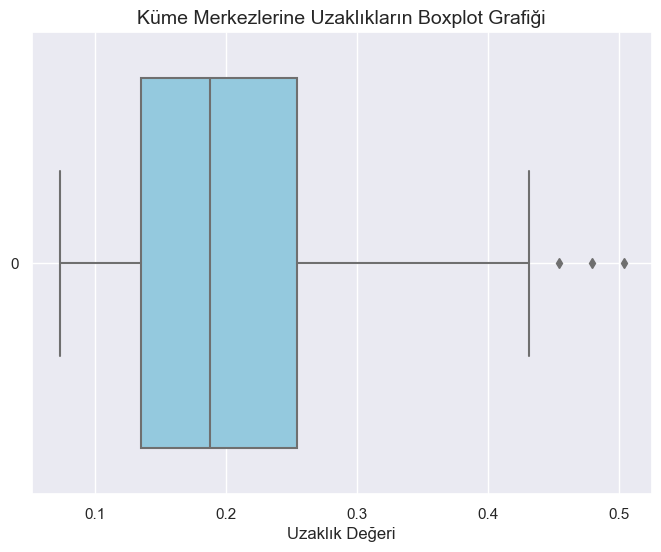

In [25]:
# küme merkezlerine uzaklıkların boxplot grafiği 
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot çizimi
plt.figure(figsize=(8, 6))
sns.boxplot(data=distances, orient="h", color="skyblue")

plt.title("Küme Merkezlerine Uzaklıkların Boxplot Grafiği", fontsize=14)
plt.xlabel("Uzaklık Değeri")
plt.grid(True)
plt.show()

In [26]:
# eşik değerin üzerindeki uzaklıkları aykırı (1), altında kalanları normal (0) olarak etiketle
km_y_pred = np.array(distances)
threshold = np.percentile(distances, 95)
km_y_pred[distances >= threshold] = 1
km_y_pred[distances < threshold] = 0

In [27]:
virginica_clus = pd.concat([virginica_df, pd.DataFrame(virginica_sc_clusters, columns=['Clusters'])],axis=1)

In [28]:
print(virginica_clus.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.7               3.2                1.3               0.2   
1                5.0               3.4                1.5               0.2   
2                4.9               3.1                1.5               0.1   
3                4.8               3.4                1.6               0.2   
4                6.3               3.3                6.0               2.5   
5                5.8               2.7                5.1               1.9   
6                7.1               3.0                5.9               2.1   
7                6.3               2.9                5.6               1.8   
8                6.5               3.0                5.8               2.2   
9                7.6               3.0                6.6               2.1   

     species  Clusters  
0  virginica         2  
1  virginica         2  
2  virginica         2  
3  virginica         2  
4  vi

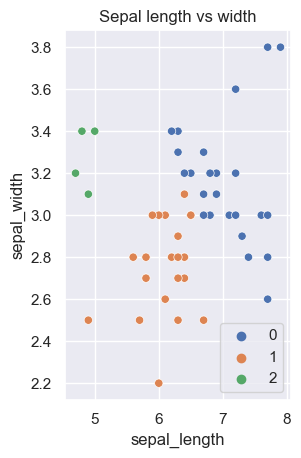

In [29]:
# kümelerden birinin yalnızca yanlış etiketlenmiş durumunu görsel üzerinde kontrol et
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1)

sns.scatterplot(
    data=virginica_clus,
    x='sepal length (cm)', 
    y='sepal width (cm)',
    hue='Clusters',
    palette='deep')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='lower right')
plt.title('Sepal length vs width')
plt.show()

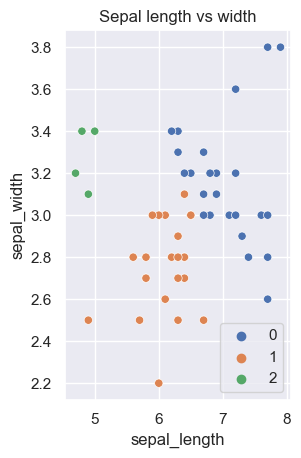

In [30]:
# kümelerden birinin yalnızca yanlış etiketlenmiş durumunu görsel üzerinde kontrol et
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=virginica_clus,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='Clusters',
    palette='deep')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='lower right')
plt.title('Sepal length vs width')
plt.show()

In [31]:
dbs = DBSCAN(eps=0.75, min_samples=2, n_jobs=-1).fit(virginica_sc)  # veride yoğunluk temelli kümeleme yap ve kümeleri belirle

In [32]:
pred_labels = dbs.labels_  # kümeleme sonucu oluşan gerçek küme sayısını bul (gürültü hariç)
n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

In [33]:
# kümeleme sonuçlarını ve toplam küme sayısını ekrana yazdır
print("Predicted Labels:")
print(pred_labels)
print()

print("Number of Clusters:")
print(n_clusters)
print()

print("Info:")
print("Tahmini küme sayısı: %d" % n_clusters)

Predicted Labels:
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Number of Clusters:
2

Info:
Tahmini küme sayısı: 2


In [34]:
virginica_db = pd.concat([virginica_clus,pd.DataFrame(pred_labels,columns=['dbs_cluster'])],axis=1)  # dbs_cluster sonuçlarını veri kümesine dahil et

In [35]:
virginica_db.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Clusters,dbs_cluster
0,4.7,3.2,1.3,0.2,virginica,2,0
1,5.0,3.4,1.5,0.2,virginica,2,0
2,4.9,3.1,1.5,0.1,virginica,2,0
3,4.8,3.4,1.6,0.2,virginica,2,0
4,6.3,3.3,6.0,2.5,virginica,0,1
5,5.8,2.7,5.1,1.9,virginica,1,1
6,7.1,3.0,5.9,2.1,virginica,0,1
7,6.3,2.9,5.6,1.8,virginica,1,1
8,6.5,3.0,5.8,2.2,virginica,0,1
9,7.6,3.0,6.6,2.1,virginica,0,1
